In [1]:
# libraries
import sqlite3
import pandas as pd

In [2]:
# connection object to connect to the SQLite Database
con = sqlite3.connect("C:/Users/sgiri/Desktop/Prep for SRH/Sem 1/Programming/FPA_FOD_20170508.sqlite")

# creating an explicit cursor to extract data from the database
ex_cursor = con.cursor()

In [3]:
# running a query to count the number of the various tables in the Database
ex_cursor.execute("SELECT count(*) FROM sqlite_master WHERE type = 'table';")
count = ex_cursor.fetchone()
print(type(count))
print(count)

# storing the number of tables in a variable
table_count = int(count[0])
print(table_count)

# running a query to fetch the names of the various tables in the Database
ex_cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
names = ex_cursor.fetchall()
print(type(names))
print(names)

# creating a list to store the table names
table_names = []

# converting the list of tuples of strings to a simple list of strings
for loop_var1 in range(table_count):
    temp_tup = names[loop_var1]
    table_names.append(str(temp_tup[0]))

# displaying the new list of table names
print(table_names)
print(len(table_names))

<class 'tuple'>
(27,)
27
<class 'list'>
[('spatial_ref_sys',), ('spatialite_history',), ('sqlite_sequence',), ('geometry_columns',), ('spatial_ref_sys_aux',), ('views_geometry_columns',), ('virts_geometry_columns',), ('geometry_columns_statistics',), ('views_geometry_columns_statistics',), ('virts_geometry_columns_statistics',), ('geometry_columns_field_infos',), ('views_geometry_columns_field_infos',), ('virts_geometry_columns_field_infos',), ('geometry_columns_time',), ('geometry_columns_auth',), ('views_geometry_columns_auth',), ('virts_geometry_columns_auth',), ('sql_statements_log',), ('SpatialIndex',), ('ElementaryGeometries',), ('KNN',), ('Fires',), ('idx_Fires_Shape',), ('idx_Fires_Shape_node',), ('idx_Fires_Shape_rowid',), ('idx_Fires_Shape_parent',), ('NWCG_UnitIDActive_20170109',)]
['spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_ge

### Reason: Due to the property of Virtual Tables that prevents them from being Indexed, Triggered or Altered (along with the Virtual Tables in this database not being significant to our model) we decided to drop them to avoid sqlite3 Operational Errors regarding Spatial Indexing.

In [4]:
#Dropping the Virtual Tables
table_names.remove("SpatialIndex")
table_names.remove("ElementaryGeometries")
table_names.remove("idx_Fires_Shape")
table_names.remove("KNN")
print(table_names)
print(len(table_names))

['spatial_ref_sys', 'spatialite_history', 'sqlite_sequence', 'geometry_columns', 'spatial_ref_sys_aux', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'Fires', 'idx_Fires_Shape_node', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_parent', 'NWCG_UnitIDActive_20170109']
23


In [5]:
# converting tables to dataframes
for item in table_names:
    print("select * from " + item)
    query = "select * from " + item
    print("Converting the table to a pandas dataframe")
    df = pd.read_sql_query(query, con)

    # overview of the tables
    print(df.info())

select * from spatial_ref_sys
Converting the table to a pandas dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   srid          4924 non-null   int64 
 1   auth_name     4924 non-null   object
 2   auth_srid     4924 non-null   int64 
 3   ref_sys_name  4924 non-null   object
 4   proj4text     4924 non-null   object
 5   srtext        4924 non-null   object
dtypes: int64(2), object(4)
memory usage: 230.9+ KB
None
select * from spatialite_history
Converting the table to a pandas dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_id         16 non-null     int64 
 1   table_name       16 non-null     object
 2   geometry_column  4 non-null      object
 3   event            16 

In [6]:
# using the .info() function, we could see that the table relevant to our project is "Fires"
# Therefore, we will export only this table to Dataframes for further operations
df_Fires = pd.read_sql_query("select * from Fires", con)

In [7]:
# closing the database connection
con.close()

# Data Cleaning:

In [8]:
# checking zeros
print('Columns With Zero')
print((df_Fires == 0).sum())

# deleting the rows with zero values in the column owner code   
df_Fires.drop(df_Fires.index[df_Fires["OWNER_CODE"] == 0], inplace = True)
print((df_Fires == 0).sum())

# overview of the tables after deleting the rows with zero values in the column owner code
print(df_Fires.info())

Columns With Zero
OBJECTID                       0
FOD_ID                         0
FPA_ID                         0
SOURCE_SYSTEM_TYPE             0
SOURCE_SYSTEM                  0
NWCG_REPORTING_AGENCY          0
NWCG_REPORTING_UNIT_ID         0
NWCG_REPORTING_UNIT_NAME       0
SOURCE_REPORTING_UNIT          0
SOURCE_REPORTING_UNIT_NAME     0
LOCAL_FIRE_REPORT_ID           0
LOCAL_INCIDENT_ID              0
FIRE_CODE                      0
FIRE_NAME                      0
ICS_209_INCIDENT_NUMBER        0
ICS_209_NAME                   0
MTBS_ID                        0
MTBS_FIRE_NAME                 0
COMPLEX_NAME                   0
FIRE_YEAR                      0
DISCOVERY_DATE                 0
DISCOVERY_DOY                  0
DISCOVERY_TIME                 0
STAT_CAUSE_CODE                0
STAT_CAUSE_DESCR               0
CONT_DATE                      0
CONT_DOY                       0
CONT_TIME                      0
FIRE_SIZE                      0
FIRE_SIZE_CLASS          

In [9]:
# checking for nulls
print('Columns With Nulls')
print(df_Fires.isnull().sum())

# deleting the column with null values
df_Fires.dropna(how='any', axis = 1, inplace=True)
print("\n DataFrame after deleting columns\n ----------")
print(df_Fires.isnull().sum())

# overview of the tables after deleting the column with null values
print(df_Fires.info())

Columns With Nulls
OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459274
LOCAL_INCIDENT_ID              820806
FIRE_CODE                     1555635
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854733
ICS_209_NAME                  1854733
MTBS_ID                       1869447
MTBS_FIRE_NAME                1869447
COMPLEX_NAME                  1875267
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      

In [10]:
# for categorical variables
# checking number of unique value in each column 
print(df_Fires.nunique())

# checking for unique values in the column STAT_CAUSE_DESCR
print(df_Fires.STAT_CAUSE_DESCR.unique())

# checking for unique values in the column STATE
print(df_Fires.STATE.unique())

OBJECTID                      1880450
FOD_ID                        1880450
FPA_ID                        1880447
SOURCE_SYSTEM_TYPE                  3
SOURCE_SYSTEM                      38
NWCG_REPORTING_AGENCY              11
NWCG_REPORTING_UNIT_ID           1640
NWCG_REPORTING_UNIT_NAME         1635
SOURCE_REPORTING_UNIT            4992
SOURCE_REPORTING_UNIT_NAME       4441
FIRE_YEAR                          24
DISCOVERY_DATE                   8766
DISCOVERY_DOY                     366
STAT_CAUSE_CODE                    13
STAT_CAUSE_DESCR                   13
FIRE_SIZE                       13637
FIRE_SIZE_CLASS                     7
LATITUDE                       894056
LONGITUDE                      997529
OWNER_CODE                         15
OWNER_DESCR                        15
STATE                              52
Shape                         1569694
dtype: int64
['Miscellaneous' 'Lightning' 'Debris Burning' 'Campfire' 'Equipment Use'
 'Arson' 'Children' 'Railroad' 'Smoking'

# Data Visualization:

Text(0.5, 0, 'Cause of the Fire')

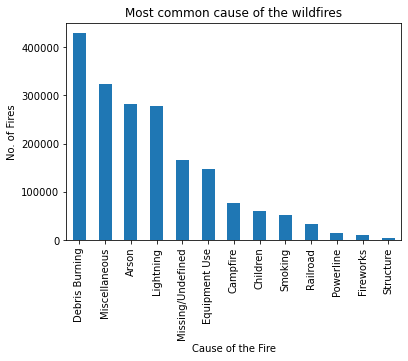

In [28]:
# libraries
import seaborn as sns 
import matplotlib.pyplot as plt

# Plotting bar graph for cause of wildfire by the total no of incidents that occured
fire_cause= df_Fires['STAT_CAUSE_DESCR'].groupby(df_Fires['STAT_CAUSE_DESCR']).count().sort_values(ascending=False)
list(fire_cause.index)
fire_cause.plot(kind='bar')
plt.title('Most common cause of the wildfires')
plt.ylabel('No. of Fires')
plt.xlabel('Cause of the Fire')

     STAT_CAUSE_DESCR      OBJECTID        FOD_ID  DISCOVERY_DATE  \
6           Lightning  6.182242e+05  4.335486e+07    2.452939e+06   
9           Powerline  1.315388e+06  1.403537e+08    2.454847e+06   
8   Missing/Undefined  1.078392e+06  8.763495e+07    2.453073e+06   
4       Equipment Use  9.859020e+05  5.063829e+07    2.452993e+06   
12          Structure  1.108688e+06  9.529592e+07    2.454140e+06   
1            Campfire  7.851288e+05  5.399487e+07    2.453089e+06   
7       Miscellaneous  1.052294e+06  6.677325e+07    2.453654e+06   
0               Arson  8.997279e+05  3.483878e+07    2.452654e+06   
5           Fireworks  8.363841e+05  6.782855e+07    2.453808e+06   
10           Railroad  9.523734e+05  2.129531e+07    2.451720e+06   
11            Smoking  9.427785e+05  4.135479e+07    2.452542e+06   
3      Debris Burning  1.047023e+06  5.878876e+07    2.453151e+06   
2            Children  8.682445e+05  3.494658e+07    2.452447e+06   

    STAT_CAUSE_CODE   FIRE_SIZE  

Text(0.5, 0, 'Size of the Fire')

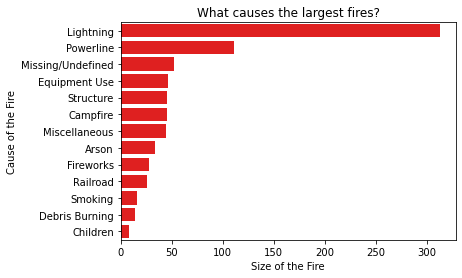

In [12]:
# plotting graph for wildfire size by cause of wildfire
avg_fsize = df_Fires.groupby('STAT_CAUSE_DESCR').mean().reset_index().drop(['FIRE_YEAR','DISCOVERY_DOY','LATITUDE','LONGITUDE'],axis=1).sort_values(by='FIRE_SIZE',ascending=False)
print(avg_fsize)
sns.barplot(x='FIRE_SIZE',y='STAT_CAUSE_DESCR',data=avg_fsize,color='red')
plt.title('What causes the largest fires?')
plt.ylabel('Cause of the Fire')
plt.xlabel('Size of the Fire')

# Data Preparation:

In [14]:
# forming a dataframe with only selected columns
df_subset = df_Fires[["FIRE_YEAR","DISCOVERY_DATE","STAT_CAUSE_DESCR","FIRE_SIZE","LATITUDE","LONGITUDE","STATE"]]
print(df_subset.head(10))

# 0 in the Julian Calendar is the number of days since noon January 1, 4713 BC
# converting DISCOVERY_DATE from the Julian Calendar to the Gregorian Calendar to make it more readable
df_subset["DATE_OF_DISCOVERY"] = pd.to_datetime(df_subset["DISCOVERY_DATE"] - pd.Timestamp(0).to_julian_date(), unit="D")
print(df_subset.head(10))

# dropping the Julian Data format
df_subset=df_subset.drop("DISCOVERY_DATE",axis = 1)
print(df_subset.head(10))

# while the date is now readable, it is still in the form of a Time Stamp which is be fine for simple display purposes
# Since we want to leverage the data properly and utilize the date of discovery as a feature,
# we will need to convert it into a machine readable format.
# Since we already a column for the year of the fire, we will extract the day and month from DATE_OF_DISCOVERY
# creating two new features called DAY_OF_FIRE AND MONTH_OF_FIRE
df_subset['DAY_OF_FIRE'] = df_subset['DATE_OF_DISCOVERY'].dt.day_name()
df_subset['MONTH_OF_FIRE'] = pd.DatetimeIndex(df_subset['DATE_OF_DISCOVERY']).month
print(df_subset.head(10))

# dropping the DATE_OF_DISCOVERY column
df_subset=df_subset.drop("DATE_OF_DISCOVERY",axis = 1)
print(df_subset.head(10))

   FIRE_YEAR  DISCOVERY_DATE STAT_CAUSE_DESCR  FIRE_SIZE   LATITUDE  \
0       2005       2453403.5    Miscellaneous       0.10  40.036944   
1       2004       2453137.5        Lightning       0.25  38.933056   
2       2004       2453156.5   Debris Burning       0.10  38.984167   
3       2004       2453184.5        Lightning       0.10  38.559167   
4       2004       2453184.5        Lightning       0.10  38.559167   
5       2004       2453186.5        Lightning       0.10  38.635278   
6       2004       2453187.5        Lightning       0.10  38.688333   
7       2005       2453437.5   Debris Burning       0.80  40.968056   
8       2005       2453444.5   Debris Burning       1.00  41.233611   
9       2004       2453187.5        Lightning       0.10  38.548333   

    LONGITUDE STATE  
0 -121.005833    CA  
1 -120.404444    CA  
2 -120.735556    CA  
3 -119.913333    CA  
4 -119.933056    CA  
5 -120.103611    CA  
6 -120.153333    CA  
7 -122.433889    CA  
8 -122.283333    CA 

In [15]:
# sorting the data by the values of STATE so as to allow Ordinal Encoding of the categorical variables
df_subset = df_subset.sort_values(by=["STATE"])
print(df_subset.head(10))

# using Ordinal Encoding to convert the Categorical Variables from String
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

# encoding STATE
df_subset["STATE_CODE"] = ord_enc.fit_transform(df_subset[["STATE"]])

# checking for unique values in the columns STATE and STATE_CODE
print(df_subset.STATE.unique())
print(df_subset.STATE_CODE.unique())


# encoding STAT_CAUSE_DESCR
df_subset["CAUSE_CODE"] = ord_enc.fit_transform(df_subset[["STAT_CAUSE_DESCR"]])

# checking for unique values in the columns STAT_CAUSE_DESCR and CAUSE_CODE
print(df_subset.STAT_CAUSE_DESCR.unique())
print(df_subset.CAUSE_CODE.unique())

# encoding DAY_OF_FIRE
df_subset["DAY_CODE"] = ord_enc.fit_transform(df_subset[["DAY_OF_FIRE"]])

# checking for unique values in the columns DAY_OF_FIRE and DAY_CODE
print(df_subset.DAY_OF_FIRE.unique())
print(df_subset.DAY_CODE.unique())

# getting the column names
list(df_subset.columns)

# dropping the old columns
df_subset=df_subset.drop("STATE",axis = 1)
df_subset=df_subset.drop("STAT_CAUSE_DESCR",axis = 1)
df_subset=df_subset.drop("DAY_OF_FIRE",axis = 1)
print(df_subset.head(10))

        FIRE_YEAR STAT_CAUSE_DESCR  FIRE_SIZE  LATITUDE  LONGITUDE STATE  \
305417       2002            Arson        0.3   64.7279  -146.4674    AK   
210908       1994        Lightning      500.0   65.1996  -148.7691    AK   
210907       1994        Lightning        0.5   65.6827  -161.8693    AK   
210906       1994        Lightning        2.0   65.8660  -160.6694    AK   
210905       1994        Lightning        2.0   65.1826  -162.0193    AK   
210904       1994        Lightning        3.5   64.6327  -157.9692    AK   
210903       1994         Campfire        0.1   60.4161  -150.4689    AK   
210902       1994        Lightning        4.0   64.4660  -157.4858    AK   
210901       1994        Lightning        0.1   63.7163  -144.1356    AK   
210900       1994         Campfire        0.1   62.1328  -150.2023    AK   

       DAY_OF_FIRE  MONTH_OF_FIRE  
305417     Tuesday              8  
210908      Sunday              7  
210907      Sunday              7  
210906      Sunday 

<AxesSubplot:>

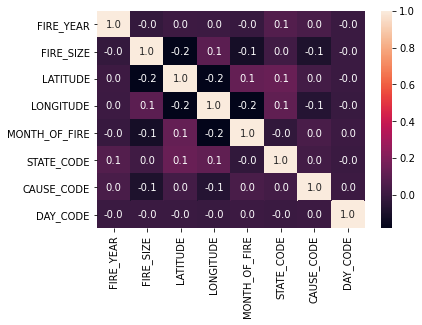

In [29]:
# plotting correlation from dataframe fire 
df_subset.corr()
sns.heatmap(df_subset.corr(method="kendall"), annot=True,fmt='0.1f')

       FIRE_SIZE  FIRE_YEAR  CAUSE_CODE
4042       47.86     1992.0         0.0
4888       85.35     1992.0         7.0
6542      317.70     1992.0         6.0
4878       84.92     1992.0         0.0
8006     1088.90     1992.0         6.0
...          ...        ...         ...
7709      876.80     2015.0         6.0
4346       58.25     2015.0         0.0
13061   40950.00     2015.0         6.0
7756      912.70     2015.0         6.0
11968   12461.10     2015.0         6.0

[13637 rows x 3 columns]
(1259901, 7)
(1259901,)
(620549, 7)
(620549,)


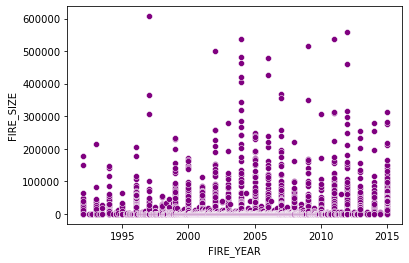

In [16]:
# segregating the Dependant and Independant Variables into separate dataframes
y = df_subset['CAUSE_CODE'].values
col_names = ["FIRE_YEAR","FIRE_SIZE","LATITUDE","LONGITUDE","MONTH_OF_FIRE","STATE_CODE","DAY_CODE"]
x = df_subset[col_names].values

# plotting graph of the size of the fire every year 
fire_year = df_subset.groupby('FIRE_SIZE').mean().reset_index().drop(["LATITUDE","LONGITUDE","MONTH_OF_FIRE","STATE_CODE","DAY_CODE"],axis=1).sort_values(by='FIRE_YEAR',ascending=True)
print(fire_year)
sns.scatterplot(x='FIRE_YEAR',y='FIRE_SIZE',data=fire_year,color='purple')

# import
from sklearn.model_selection import train_test_split

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=77)

# displaying the structure of the training and testing data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

         FIRE_SIZE  MONTH_OF_FIRE  CAUSE_CODE
12973  35300.00000            1.0         7.0
3549      37.07000            1.0         0.0
4358      58.78000            1.0         3.0
573        2.81450            1.0         3.0
4353      58.54000            1.0         0.0
...            ...            ...         ...
6743     380.10000           12.0         0.0
4899      85.90000           12.0         0.0
2899      26.41000           12.0         3.0
11555   9185.00000           12.0         8.0
0          0.00001           12.0         7.0

[13637 rows x 3 columns]


<AxesSubplot:xlabel='MONTH_OF_FIRE', ylabel='FIRE_SIZE'>

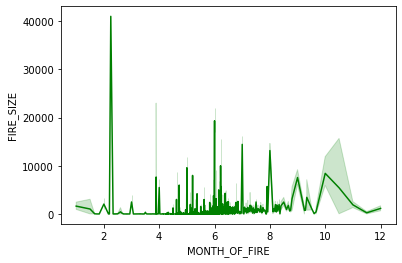

In [27]:
fire_year = df_subset.groupby('FIRE_SIZE').mean().reset_index().drop(["LATITUDE","LONGITUDE","FIRE_YEAR","STATE_CODE","DAY_CODE"],axis=1).sort_values(by='MONTH_OF_FIRE',ascending=True)
print(fire_year)
sns.lineplot(x='MONTH_OF_FIRE',y='FIRE_SIZE',data=fire_year,color='GREEN')

# Modelling:

### We will test multiple Machine Learning Classification models and pit them against each other to select the most appropriate one

In [17]:
# importing the necessary libraries
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

In [18]:
# creating a list of all the models we plan on testing
models = []
models.append(('DTCL', DecisionTreeClassifier()))
models.append(('RFCL', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [19]:
# creating blank lists to store the names of the models and their respective results
crvModels = []
crvResults = []

In [20]:
# performing cross-validation
message = "%6s: %10s %8s" % ("Model", "CRVResMean", "CRVRes-SD")
print(message)
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=77)
    crvAccuracy = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    crvResults.append(crvAccuracy)
    crvModels.append(name)
    message = "%7s: %5.7f %5.7f" % (name, crvAccuracy.mean(), crvAccuracy.std())
    print(message)

 Model: CRVResMean CRVRes-SD
   DTCL: 0.4724165 0.0004114
   RFCL: 0.5713608 0.0008576
[20:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restor

In [21]:
# for the testing data
for name, model in models:
    # fitting the model
    model.fit(x_train, y_train)

    # predicting the test set results
    y_pred = model.predict(x_test)
    print(name)
    print("Accuracy: ", accuracy_score(y_pred,y_test))
    # for the classification reports
    print("Classification Report: \n", classification_report(y_pred,y_test))

DTCL
Accuracy:  0.48247922404193705
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.47      0.46      0.46     93574
         1.0       0.30      0.30      0.30     25583
         2.0       0.19      0.17      0.18     21766
         3.0       0.48      0.49      0.49    137218
         4.0       0.28      0.27      0.27     49547
         5.0       0.34      0.33      0.33      3991
         6.0       0.70      0.71      0.70     90572
         7.0       0.43      0.43      0.43    107040
         8.0       0.83      0.83      0.83     54848
         9.0       0.12      0.12      0.12      4955
        10.0       0.37      0.36      0.36     11411
        11.0       0.11      0.11      0.11     18712
        12.0       0.07      0.07      0.07      1332

    accuracy                           0.48    620549
   macro avg       0.36      0.36      0.36    620549
weighted avg       0.48      0.48      0.48    620549

RFCL
Accuracy:  0.

### Since Random Forest Classifier proved to be the algorithm with the highest accuracy in both training and testing, we will now specifically tune Random Forest to improve the accuracy

In [22]:
# observing the parameters currently in use
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 77)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 77,
 'verbose': 0,
 'warm_start': False}


### Using RandomizedSearchCV to create a Sample Hyperparameter grid to test from for fitting

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# no. of trees in the forest forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]

# no. of features to consider at each split
max_features = ['auto', 'sqrt']

# Max no. of levels per tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 10)]
max_depth.append(None)

# Min no. of samples required to split each node
min_samples_split = [2, 4, 8]

# Min no. of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Creating the random grid
r_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(r_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200]}


### Using the grid we created to search for the best possible Hyperparameter values

In [24]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = r_grid, n_iter = 1, cv = 3, verbose=2, random_state=77,n_jobs = -1)

# fitting the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 18.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 6, 11, 17, 22, 28, 33,
                                                      39, 44, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]},
                   random_state=77, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 22,
 'bootstrap': False}

### We will now use the Hyperparameter values suggested by RandomSearch and compare it with our baseline model

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=155, max_depth=22, min_samples_split=4,min_samples_leaf=3,max_features="auto",bootstrap=False,random_state=77)

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.5844131567370183
